In [31]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, make_scorer,mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [14]:
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Path to dataset files:", path)

csv_file_path = os.path.join(path, "StudentPerformanceFactors.csv")

df = pd.read_csv(csv_file_path)

df.shape


Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/7


(6607, 20)

In [15]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


from matplotlib import pyplot as plt
_df_12['Hours_Studied'].plot(kind='hist', bins=20, title='Hours_Studied')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Attendance'].plot(kind='hist', bins=20, title='Attendance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Sleep_Hours'].plot(kind='hist', bins=20, title='Sleep_Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Previous_Scores'].plot(kind='hist', bins=20, title='Previous_Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Hours_Studied', y='Attendance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Attendance', y='Sleep_Hours', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Sleep_Hours', y='Previous_Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Previous_Scores', y='Tutoring_Sessions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Hours_Studied'].plot(kind='line', figsize=(8, 4), title='Hours_Studied')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Attendance'].plot(kind='line', figsize=(8, 4), title='Attendance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Sleep_Hours'].plot(kind='line', figsize=(8, 4), title='Sleep_Hours')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Previous_Scores'].plot(kind='line', figsize=(8, 4), title='Previous_Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
# check the type of features
# sort categorical and numerical data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)
df.info()

Numerical Columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
Categorical Columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previou

In [24]:
# handle missing data
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [25]:
# drop null value
df_na = df.dropna()
print(df_na.shape)
df_na.isnull().sum()

(6378, 20)


,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [27]:
#Convert categorical features into numerical values
df = pd.get_dummies(df, columns=['Parental_Involvement', 'School_Type'], drop_first=True)
le = LabelEncoder()
df['Motivation_Level'] = le.fit_transform(df['Motivation_Level'])

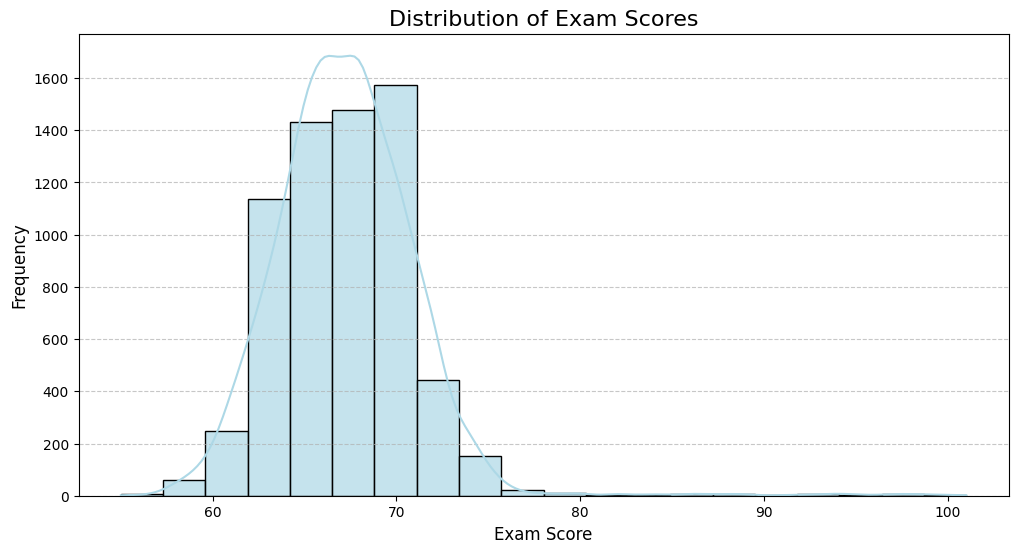

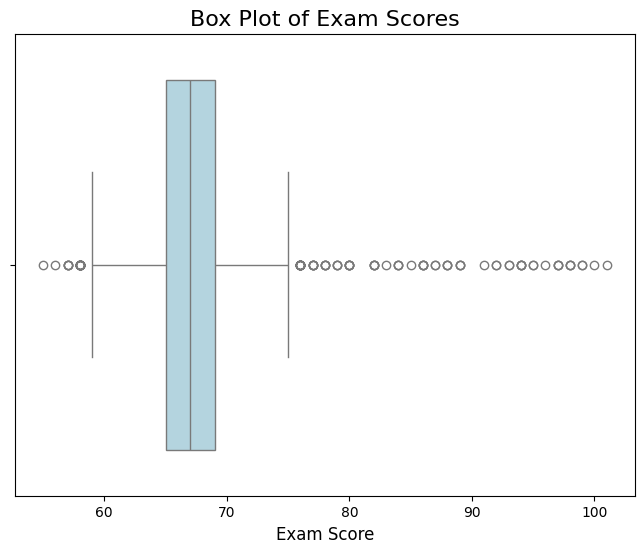

In [26]:
# Plot the distribution of 'Exam_Score'
plt.figure(figsize=(12, 6))
sns.histplot(df['Exam_Score'], bins=20, kde=True, color='lightblue', alpha=0.7)
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot the box plot for 'Exam_Score'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Exam_Score'], color='lightblue')
plt.title('Box Plot of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=12)
plt.show()

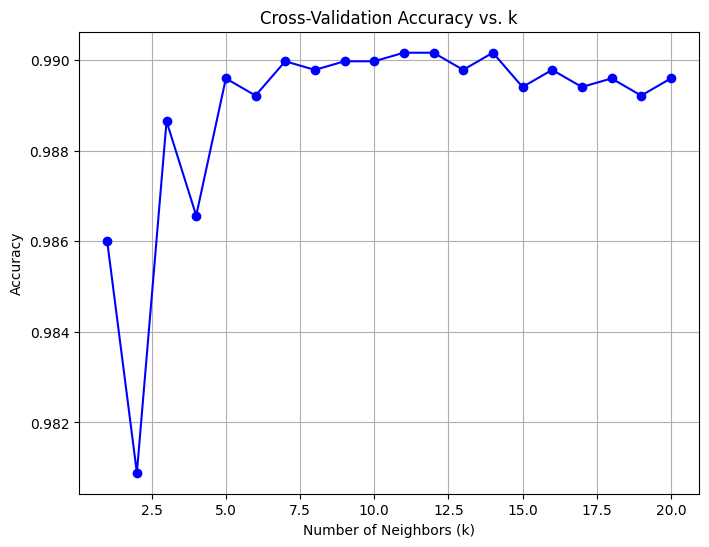

The optimal number of neighbors (k) is: 11
Test Accuracy with k=11: 99.32%


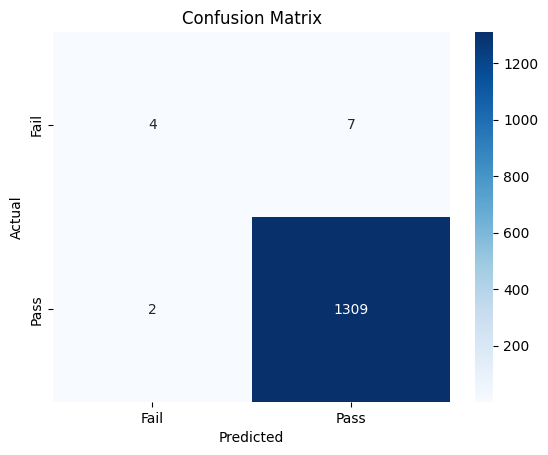

In [34]:
# Task 1: Transforming the dataset to make it useful for binary classification by introducing the pass/fail value of let's say 60% - kNN Algorith
# Transform the dataset
threshold = 60  # Pass threshold
df['PassFail'] = (df['Exam_Score'] >= threshold).astype(int)

# Select Features and Target
features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions']
X = df[features]
y = df['PassFail']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Cross-Validation to find the best k
k_range = range(1, 21)  # Testing k values from 1 to 20
cv_scores = []

# Evaluate cross-validation score for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_scores.append(scores.mean())  # Store the mean score for each k

# Plot cross-validation results
plt.figure(figsize=(8, 6))
plt.plot(k_range, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Select the best k
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors (k) is: {best_k}")

# Train the final model with the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = knn_best.score(X_test, y_test)
print(f"Test Accuracy with k={best_k}: {test_accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()